# Data Analysis and Fitting
# Forward Models and Inverse Problems
Below an example of how to fit a linear forward model to linear data. Solving the inverse problem, solving for the slope, m, and y-intercept, b, using least-squares is also demonstrated.

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
font = {'size'   : 18}
matplotlib.rc('font', **font)
# set the random seed; get the same results each time we run this notebook
seed = sum([ord(x) for x in 'isrschool'])
np.random.seed(seed)
m_true = 3.5
b_true = -2

## Forward Model
Here we are working with a simple linear model:
$y = mx+b$

For this example, we'll define the true values for the parameters to be:
* m = 3.5
* b = -2

In [2]:
def model(x,m,b):
    return m*x + b

### Some measured data
Here we can generate some "measured data". Measurements have some error, so we'll add some by adding random numbers. Of course, in the real world, we get our measurements from an instrument! We don't generate the data ourselves...

In [3]:
x = np.linspace(-10,10,num=51)
data = model(x,m=m_true,b=b_true) + 2*np.random.randn(x.size)

And we can plot these measurements

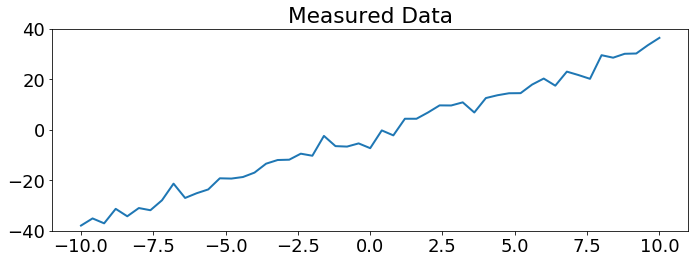

In [4]:
fig = pyplot.figure(figsize=(10,4))
ax = fig.add_subplot(111)
l = ax.plot(x,data,lw=2)
ax.set_title('Measured Data')
lim = ax.set_ylim([-40,40])
fig.tight_layout()

## The Inverse Problem
### Solving for 'm' and 'b': A naive approach
Due to measurement error, we can't simply solve for 'm' and 'b'. But let's try anyway.

We can solve for 'm' and 'b' for all pairs of measurements:

$m = \frac{y_{i+1} - y_{i}}{x_{i+1} - x_{i}} \quad b = y_{i+1} - mx_{i+1}$

Then we'll plot a histogram of the 'm's and 'b's that we calculated.

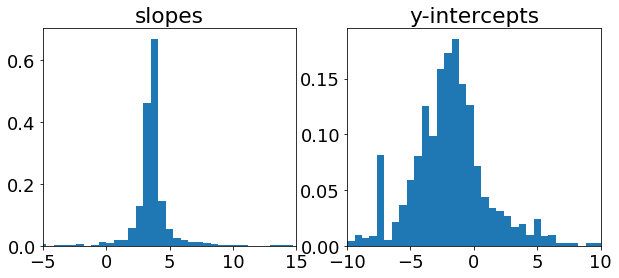

In [5]:
# for every pair of x and y, calculate a slope and y-intercept
ms = list()
bs = list()
for i in range(1,x.size):
    for j in range(i):
        m = (data[i] - data[j]) / (x[i] - x[j])
        b = data[i] - m*x[i]
        ms.append(m)
        bs.append(b)

# then plot a histogram of the slopes and y-intercepts
fig = pyplot.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
tmp = ax1.hist(ms,bins=51,range=[-10,20],density=True)
ax1.set_title('slopes')
tmp = ax1.set_xlim([-5,15])
ax2 = fig.add_subplot(122)
tmp = ax2.hist(bs,bins=51,range=[-20,10],density=True)
ax2.set_title('y-intercepts')
tmp = ax2.set_xlim([-10,10])


But there are spikes and the distributions aren't symmetric! So what is the best value? Should we take a mean? Median? What if the data points have different errors?

## Solving for 'm' and 'b': Least-squares
But there's a better way! We can estimate the slope and y-intercept that "best fit" the data. Using the least-squares techniques, the "best fit" is the one that minimizes the sum:

$ \chi^2 = \sum^M_{m=1}{\frac{\left(d_m-y_m\right)^2}{\sigma_m^2}} $

where $d_m$ is the $m$-th data point and $y_m$ is the model evaluated at the $m$-th $x$ value. $\sigma_m$ is the error in the $m$-th data point, but we'll assume $\sigma_m=1$ for this example.

### The Brute Force Method

Usually, we know the domain of realistic values for model parameters. So let's calculate the chi-squared ($\chi^2$) value for all $m \in [-5,10] $ and $b \in [-20,20]$. Then we can plot the chi-squared as a function of the model parameters:

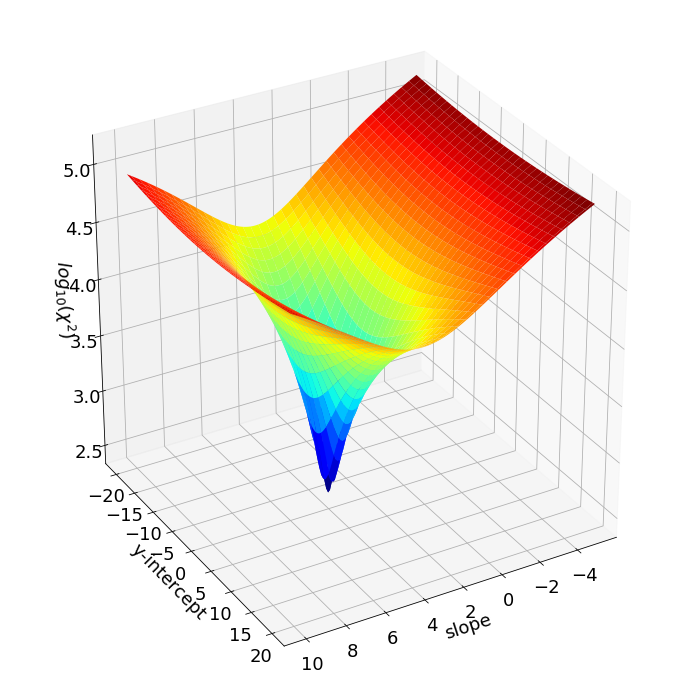

In [6]:
ms = np.linspace(-5,10,num=151)
bs = np.linspace(-20,20,num=101)

chis = np.zeros((ms.size,bs.size))
for i,m in enumerate(ms):
    for j,b in enumerate(bs):
        diff = data - model(x,m=m,b=b)
        chis[i,j] = np.sum(diff**2)
        
#find the minimum        
min_chi = np.min(chis)
ind1, ind2 = np.where(chis==min_chi)
best_m = ms[ind1[0]]
best_b = bs[ind2[0]]

# now plot
M,B = np.meshgrid(ms,bs)
fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
tmp = ax.plot_surface(M,B,np.log10(chis.T),cmap='jet')
tmp = ax.view_init(30,60)
tmp = ax.set_xlabel('slope')
tmp = ax.set_ylabel('y-intercept')
tmp = ax.set_zlabel('$log_{10}(\chi^2$)')
fig.tight_layout()

As we can see in the plot, there is clearly a slope and y-intercept that minimize the chi-squared! Let's take those and generate a "best-fit" line to compare with our data:

True slope: 3.50
True y-int: -2.00
Best fit slope: 3.60
Best fit y-int: -2.00


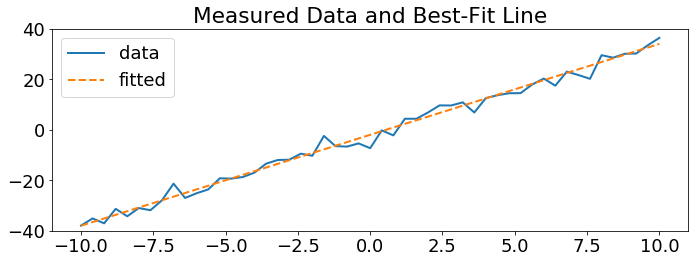

In [7]:
# use best fit parameters to generate a best-fit line:
best_fit = model(x,m=best_m,b=best_b)

# print best fit values and compare to true values
print('True slope: %0.2f\nTrue y-int: %0.2f' % (m_true,b_true))
print('Best fit slope: %0.2f\nBest fit y-int: %0.2f' % (best_m,best_b))

#plot the data with the best-fit line on top
fig = pyplot.figure(figsize=(10,4))
ax = fig.add_subplot(111)
l = ax.plot(x,data,lw=2,label='data')
l = ax.plot(x,best_fit,'--',lw=2,label='fitted')
ax.set_title('Measured Data and Best-Fit Line')
ax.legend()
lim = ax.set_ylim([-40,40])
fig.tight_layout()